In [21]:
import nltk
nltk.download('all')

[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to /root/nltk_data...
[nltk_data]    |   Package abc is already up-to-date!
[nltk_data]    | Downloading package alpino to /root/nltk_data...
[nltk_data]    |   Package alpino is already up-to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Package averaged_perceptron_tagger is already up-
[nltk_data]    |       to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger_eng to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Package averaged_perceptron_tagger_eng is already
[nltk_data]    |       up-to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger_ru to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Package averaged_perceptron_tagger_ru is already
[nltk_data]    |       up-to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger_r

True

In [22]:
from nltk import sent_tokenize, word_tokenize

In [36]:
text= "In this lecture, we will study the economic impact of healthcare systems. Understanding patient treatment costs and hospital revenue streams is crucial for managing medical facilities efficiently. Students will analyze case studies involving insurance payments and the diagnosis process to learn how financial and medical factors interact in healthcare management."

In [37]:
#Sentence tokenize
sentences= sent_tokenize(text)
print(sentences)
#word Tokenize
words = [word_tokenize(sentence) for sentence in sentences]
print(words)

['In this lecture, we will study the economic impact of healthcare systems.', 'Understanding patient treatment costs and hospital revenue streams is crucial for managing medical facilities efficiently.', 'Students will analyze case studies involving insurance payments and the diagnosis process to learn how financial and medical factors interact in healthcare management.']
[['In', 'this', 'lecture', ',', 'we', 'will', 'study', 'the', 'economic', 'impact', 'of', 'healthcare', 'systems', '.'], ['Understanding', 'patient', 'treatment', 'costs', 'and', 'hospital', 'revenue', 'streams', 'is', 'crucial', 'for', 'managing', 'medical', 'facilities', 'efficiently', '.'], ['Students', 'will', 'analyze', 'case', 'studies', 'involving', 'insurance', 'payments', 'and', 'the', 'diagnosis', 'process', 'to', 'learn', 'how', 'financial', 'and', 'medical', 'factors', 'interact', 'in', 'healthcare', 'management', '.']]


In [38]:
#lower case
from string import *
lower_case_words = [[word.lower() for word in sentence] for sentence in words]
print(lower_case_words)

[['in', 'this', 'lecture', ',', 'we', 'will', 'study', 'the', 'economic', 'impact', 'of', 'healthcare', 'systems', '.'], ['understanding', 'patient', 'treatment', 'costs', 'and', 'hospital', 'revenue', 'streams', 'is', 'crucial', 'for', 'managing', 'medical', 'facilities', 'efficiently', '.'], ['students', 'will', 'analyze', 'case', 'studies', 'involving', 'insurance', 'payments', 'and', 'the', 'diagnosis', 'process', 'to', 'learn', 'how', 'financial', 'and', 'medical', 'factors', 'interact', 'in', 'healthcare', 'management', '.']]


In [40]:
from nltk.corpus import stopwords
sw = stopwords.words('english')
print('stopwords:',sw)

cleaned_words = [[word for word in sentence if word not in sw] for sentence in lower_case_words]
print('cleaned words:',cleaned_words)

stopwords: ['a', 'about', 'above', 'after', 'again', 'against', 'ain', 'all', 'am', 'an', 'and', 'any', 'are', 'aren', "aren't", 'as', 'at', 'be', 'because', 'been', 'before', 'being', 'below', 'between', 'both', 'but', 'by', 'can', 'couldn', "couldn't", 'd', 'did', 'didn', "didn't", 'do', 'does', 'doesn', "doesn't", 'doing', 'don', "don't", 'down', 'during', 'each', 'few', 'for', 'from', 'further', 'had', 'hadn', "hadn't", 'has', 'hasn', "hasn't", 'have', 'haven', "haven't", 'having', 'he', "he'd", "he'll", 'her', 'here', 'hers', 'herself', "he's", 'him', 'himself', 'his', 'how', 'i', "i'd", 'if', "i'll", "i'm", 'in', 'into', 'is', 'isn', "isn't", 'it', "it'd", "it'll", "it's", 'its', 'itself', "i've", 'just', 'll', 'm', 'ma', 'me', 'mightn', "mightn't", 'more', 'most', 'mustn', "mustn't", 'my', 'myself', 'needn', "needn't", 'no', 'nor', 'not', 'now', 'o', 'of', 'off', 'on', 'once', 'only', 'or', 'other', 'our', 'ours', 'ourselves', 'out', 'over', 'own', 're', 's', 'same', 'shan', "sh

In [39]:
import string
cleaned_words = [[word for word in sentence if word not in sw and word not in string.punctuation] for sentence in lower_case_words]

In [41]:
#punctuation removal
import string
cleaned_words = [[word for word in sentence if word not in sw and word not in string.punctuation] for sentence in lower_case_words]
print('cleaned words:',cleaned_words)

cleaned words: [['lecture', 'study', 'economic', 'impact', 'healthcare', 'systems'], ['understanding', 'patient', 'treatment', 'costs', 'hospital', 'revenue', 'streams', 'crucial', 'managing', 'medical', 'facilities', 'efficiently'], ['students', 'analyze', 'case', 'studies', 'involving', 'insurance', 'payments', 'diagnosis', 'process', 'learn', 'financial', 'medical', 'factors', 'interact', 'healthcare', 'management']]


In [42]:
# Flatten the list of lists into a single list
flattened_words = [word for sentence in cleaned_words for word in sentence]

In [43]:
financial_keywords = {'invoice', 'bank', 'account', 'tax', 'payment', 'revenue'}
medical_keywords = {'patient', 'diagnosis', 'fever', 'treatment', 'prescription', 'symptom'}
education_keywords = {'lecture', 'assignment', 'exam', 'course', 'student', 'syllabus'}
def classify_document(words):
    # Count keywords in each category
    financial_count = sum(word in financial_keywords for word in words)
    medical_count = sum(word in medical_keywords for word in words)
    education_count = sum(word in education_keywords for word in words)

    counts = {
        'Financial': financial_count,
        'Medical': medical_count,
        'Education': education_count
    }

    # Find category with max count
    max_category = max(counts, key=counts.get)

    # If all counts are zero, classify as 'Unknown'
    if counts[max_category] == 0:
        return 'Unknown'
    else:
        return max_category


category = classify_document(flattened_words)
print("Document classified as:", category)

Document classified as: Medical


In [45]:
!pip install wordcloud

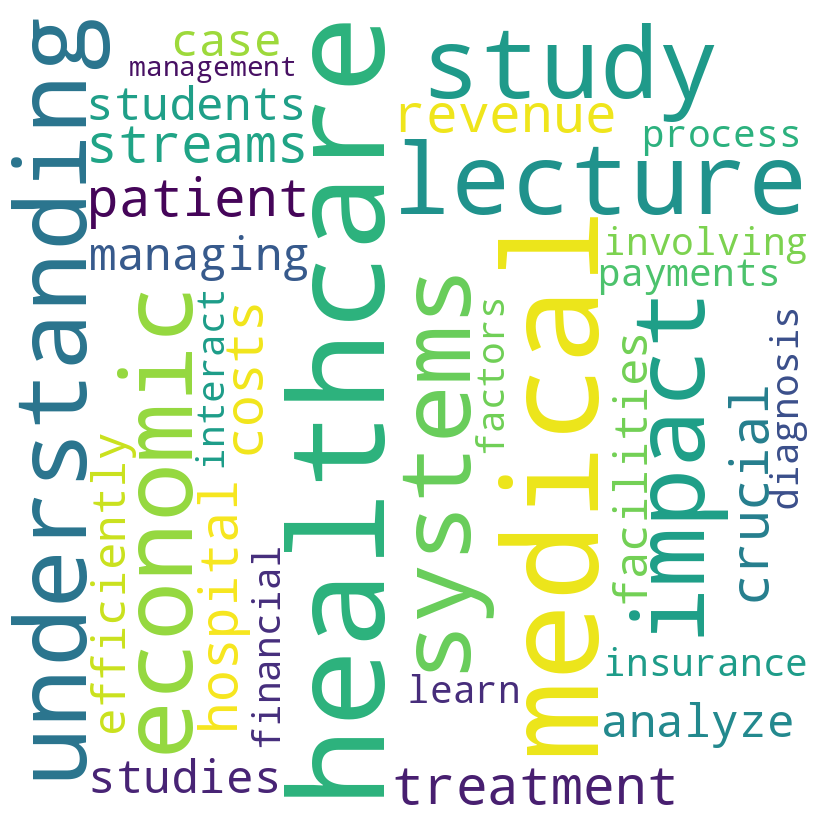

In [46]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Combine all the words into a single string
text_for_wordcloud = " ".join(flattened_words)

# Create a WordCloud object
wordcloud = WordCloud(width = 800, height = 800,
                background_color ='white',
                stopwords = None,
                min_font_size = 10).generate(text_for_wordcloud)

# Plot the WordCloud image
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)

plt.show()